# NASA Exoplanet Data Analysis
### CMPS530 | Final Project | Robert Biebrich | 2023

## Introduction:
One of the most astounding examples of scientific progress in the last century has been the discovery and successive rapid catalogging of inumerable planets outside our solar system. These planets, called extrasolar planets or exoplanets for short, are alien worlds foreign to us in just about every way imaginable. They orbit distant stars which they call their sun or suns, as many of the systems contain more than one star! Many grew up in a rather different neighborhood of the Milky Way than our own.

It's not that we found aliens (yet), or that aliens found us (yet). Rather, we have discovered alien worlds. These planets, orbiting stars other than our own local Sun, are called exoplanets and, through the incredible developments science and engineering such as the Hubble and James Webb Space Telescopes, the Kepler and TESS Spacecrafts, we have catalogged thousands.

In [15]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The table downloaded from the NASA Exoplanet Archive looks like this:

In [16]:
# Importing the data as a Pandas DataFrame
raw_data = pd.read_csv('NASA-Exoplanet-Archive.csv')
raw_data.head(5)

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,disc_instrument,...,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
1,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
2,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
3,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765
4,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765


However, many of the planets are listed multiple times, as this database has archived each separate finding of each exoplanet. So for our purposes I am going to group them by name, keeping only the first reported finding of each exoplanet. Our new table, which I will be working with for the rest of the report, looks like this:

In [17]:
# Cleaning the raw data to take first instance of each planet only
data = pd.DataFrame(raw_data.groupby('pl_name').first()).reset_index()
data.head(5)

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,disc_instrument,...,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
1,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,0.07,-0.07,0.0,1.56,0.54,-0.54,0.0,125.3210,1.9765,-1.9765
2,14 And b,14 And,1,1,0,0,Radial Velocity,2008,Okayama Astrophysical Observatory,HIDES Echelle Spectrograph,...,0.06,-0.07,0.0,NaN,NaN,NaN,NaN,75.4392,0.7140,-0.7140
3,14 Her b,14 Her,1,2,0,0,Radial Velocity,2002,W. M. Keck Observatory,HIRES Spectrometer,...,0.09,-0.09,0.0,3.90,NaN,NaN,0.0,17.9323,0.0073,-0.0073
4,16 Cyg B b,16 Cyg B,3,1,0,0,Radial Velocity,1996,Multiple Observatories,Multiple Instruments,...,0.03,-0.03,0.0,NaN,NaN,NaN,NaN,21.1397,0.0110,-0.0111


## Methods:
In order to address the big questions I've posed in the introduction, I will be employing the help of numerous modules. I have imported and cleaned the data (originally a .csv file) using **pandas**.

## Results:


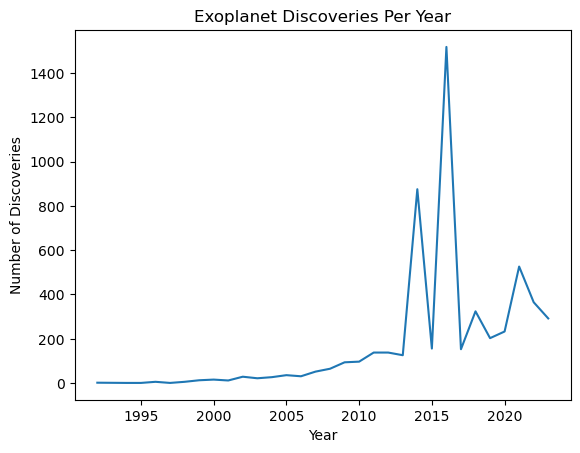

In [18]:
discoveries_per_year = data.groupby('disc_year').count()

plt.plot(discoveries_per_year['pl_name'])
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.title('Exoplanet Discoveries Per Year')

plt.show()

In [21]:
biggest_year = discoveries_per_year.sort_values('pl_name', ascending=False)['pl_name']    
biggest_year.head(5)

disc_year
2016    1517
2014     875
2021     526
2022     365
2018     324
Name: pl_name, dtype: int64